# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [323]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [324]:
# données
data = np.genfromtxt('data.csv', delimiter=',')
data.shape

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [325]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
print (X.shape)
y = data[:, 1]
X

(97, 2)


array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

Text(0, 0.5, 'Bénéfice x1000')

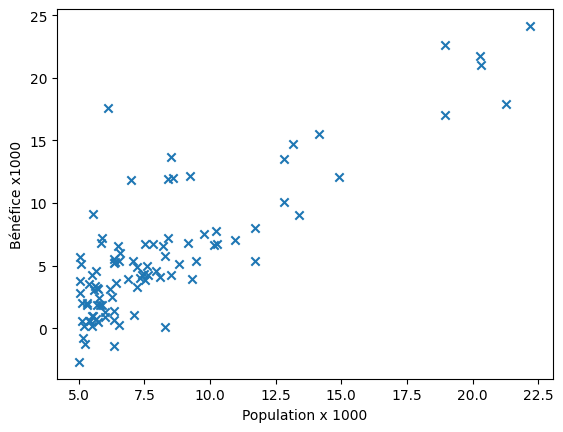

In [326]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [327]:
import time

def computeCostNonVect(X, y, theta):
    start_time = time.time()
    cost = 0
    predictions = X @ theta
    # calculer le coût sans vectorisation, 
    for x,y1 in zip(predictions,y):
        cost += (x - y1)**2
    cost = cost/(2*len(y))
    # afficher le temps de traitement
    print("temps d'execution : " ,(time.time() - start_time))
    return cost
    
    

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

In [328]:
import time
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    # calculer le coût avec vectorisation, 
    start_time = time.time()
    predictions = X @ theta # produit matriciel
    y = y.reshape(-1, 1)
    cost = np.sum((predictions - y)**2)
    cost = cost/(2*len(y))
    # afficher le temps de traitement
    # print("temps d'execution : " ,(time.time() - start_time))
    return cost

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [329]:
import numpy as np

def gradientDescent(X, y, theta, alpha, iterations):
    costs = []  # Liste pour stocker le coût à chaque itération
    m = len(y)  # Nombre d'exemples

    for i in range(iterations):
        elt = []  
        elt.append(theta[0,0])
        elt.append(theta[1,0])

        # Calcul des prédictions
        predictions = X @ theta  # Produit matriciel (X * theta)
        errors = predictions - y.reshape(-1, 1)  # Erreur entre les prédictions et y
        # Calcul du coût
        cost = np.sum(errors**2) / (2 * m)  # Fonction de coût J(theta)
        elt.append(cost)
        costs.append(elt)

        # Calcul des gradients
        grad0 = np.sum(errors) / m  # Gradient par rapport à theta0
        grad1 = np.sum(errors * X[:, 1:]) / m  # Gradient par rapport à theta1

        # Mise à jour des paramètres
        theta[0,0] = theta[0,0] - alpha * grad0
        theta[1,0] = theta[1,0] - alpha * grad1

    return theta, costs

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [330]:
theta = np.zeros((2, 1))
print(theta)

[[0.]
 [0.]]


Calculer le cout initial

In [331]:
initialCost=computeCostNonVect(X, y, theta)
print("Calcule du coup sans vectorisation :",initialCost)

temps d'execution :  0.0008139610290527344
Calcule du coup sans vectorisation : [32.07273388]


Calculer le cout initial avec vectorisation (numpy)

In [332]:
initialCost=computeCost(X, y, theta)
print("Calcule du coup avec vectorisation :",initialCost)

Calcule du coup avec vectorisation : 32.072733877455676


Appel des la fonction de calcul du gradient

In [333]:
# paramètres
iterations = 1500
alpha = 0.01
# Appel
theta, costs = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


Traçage de la ligne de régression sur les données

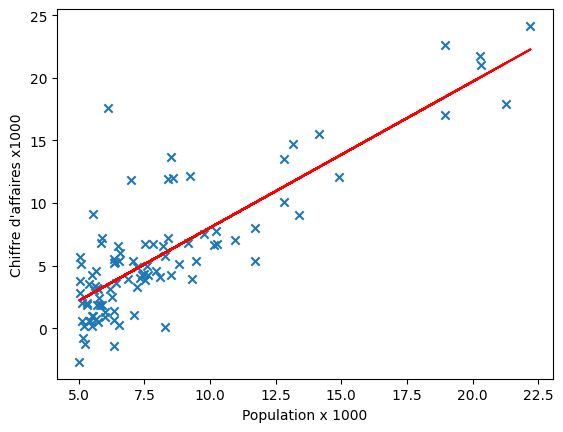

In [334]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X[:,1:],y_pred, c='red')
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de $\theta_0$ et $\theta_1$

Traçage du coût en fonction du nombre d'itérations

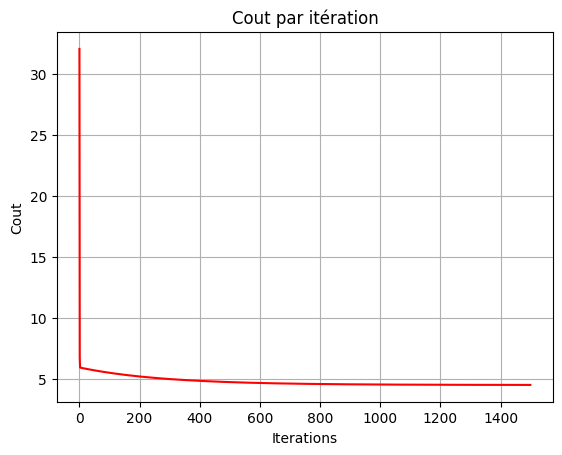

In [335]:

costs = np.array(costs)
plt.plot(costs[:,2:], c='red')
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Cout')
plt.title('Cout par itération')
plt.show()


Prédire des valeurs de y

In [336]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta)
predict1

array([0.45197679])

In [337]:
predict2 = np.matmul([1, 7],theta)
predict2

array([4.53424501])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [338]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',')
dataMulti.shape

(47, 3)

In [339]:
X=np.concatenate([np.ones((dataMulti.shape[0], 1)), dataMulti[:, 0:2]], axis=1)
print (X.shape)
y = dataMulti[:, 2]
X[0]

(47, 3)


array([1.000e+00, 2.104e+03, 3.000e+00])

Text(0, 0.5, 'Price')

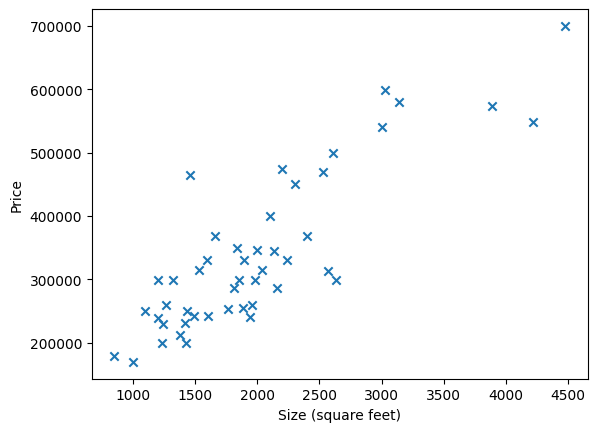

In [340]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Size (square feet)')
plt.ylabel('Price')

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [341]:
# d'abord créer X et y¨
X= dataMulti[:, 0:2]
print (X[0])
y = dataMulti[:, 2]



[2104.    3.]


In [342]:
# redéfinissez vos fonctions de coût si cela est necessaire

def gradientDescent2(X, y, theta, alpha, iterations):
    costs = []  # Liste pour stocker le coût à chaque itération
    m = len(y)  # Nombre d'exemples
    

    for i in range(iterations):
        elt = []  
        elt.append(theta)

        # Calcul des prédictions
        predictions = X @ theta  # Produit matriciel (X * theta)
        errors = predictions - y.reshape(-1, 1)  # Erreur entre les prédictions et y
        # Calcul du coût
        cost = np.sum(errors**2) / (2 * m)  # Fonction de coût J(theta)
        costs.append(cost)

        # Calcul des gradients
        gradients = (1/m) * X.T @ errors 

        # Mise à jour des paramètres
        theta = theta - alpha * gradients
    return theta, costs, elt

Normalisation des données:
$x_i = \frac{x_i - \mu_i}{\sigma_i}$

In [343]:

def featureNormalization(X):
    # Scale X values between 0 and 1
    Xscaled = X / np.max(X, axis=0)  
    
    # Get the minimum value of the scaled data along each feature
    Xmin = np.min(Xscaled, axis=0)  
    
    # Get the maximum value of the scaled data along each feature
    Xmax = np.max(Xscaled, axis=0)  
    
    # Get the mean of the scaled data along each feature
    Xmean = np.mean(Xscaled, axis=0)  
    
    # Apply normalization: subtract the mean and divide by the range (max - min)
    Xnormalized = (Xscaled - Xmean) / (Xmax - Xmin)  # Normalization
    
    return Xnormalized

Appliquer la descente du gradient à plusieurs variables

Optimized coefficients (theta): [[340412.66939734]
 [233166.31502402]
 [ 81960.87923554]]


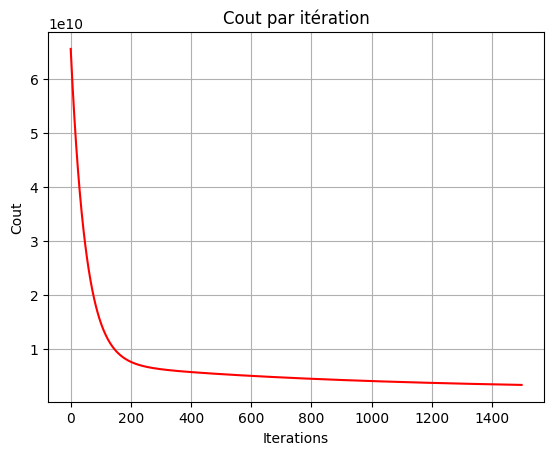

In [344]:
# Normalize the feature matrix X
X_normalized = featureNormalization(X)

# Add a column of ones to X_normalized to account for the bias term (intercept) in the model
X_normalized = np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized]

# Initialize theta (the parameters of the model) to zeros
theta_initial = np.zeros((X_normalized.shape[1], 1))

# Set the learning rate (alpha) and the number of iterations for gradient descent
alpha = 0.01
iterations = 1500

# Perform gradient descent to find the optimal values for theta and track the cost at each iteration
theta_optimal, costs, _ = gradientDescent2(X_normalized, y, theta_initial, alpha, iterations)

print("Optimized coefficients (theta):", theta_optimal)

costs = np.array(costs)

# Plot the cost function values against the number of iterations
plt.plot(costs[:], c='red')
plt.grid()  
plt.xlabel('Iterations')  
plt.ylabel('Cout')  
plt.title('Cout par itération')  
plt.show()

# Compute the predicted values of y using the learned coefficients (theta)
y_pred = np.matmul(X, theta)  


Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

In [345]:
import time 

Sans normalisation

In [346]:
# Appliquer la descente du gradient sans normalisation
start_time = time.time()
theta_multi_no_scaling, cost_history_multi_no_scaling = gradientDescent(X, y, theta, alpha, iterations)
end_time = time.time()

print("Temps d'exécution de la descente du gradient avec plusieurs variables sans normalisation :", end_time - start_time)

# Affichage de theta_multi sans normalisation
print("Theta après la descente du gradient sans normalisation :")
print(theta_multi_no_scaling)

# Affichage des coûts
initial_cost_with_scaling = cost_history_multi_no_scaling[0][2]
final_cost_with_scaling = cost_history_multi_no_scaling[-1][2]
print("Coût initial sans normalisation:", initial_cost_with_scaling)
print("Coût final sans normalisation:", final_cost_with_scaling)

Temps d'exécution de la descente du gradient avec plusieurs variables sans normalisation : 0.053014516830444336
Theta après la descente du gradient sans normalisation :
[[nan]
 [nan]]
Coût initial sans normalisation: 68395002454.07477
Coût final sans normalisation: nan


C:\Users\Techno Matique\AppData\Local\Temp\ipykernel_16900\2792442990.py:16: RuntimeWarning: overflow encountered in square
  cost = np.sum(errors**2) / (2 * m)  # Fonction de coût J(theta)
C:\Users\Techno Matique\AppData\Roaming\Python\Python313\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Techno Matique\AppData\Local\Temp\ipykernel_16900\2792442990.py:25: RuntimeWarning: invalid value encountered in scalar subtract
  theta[0,0] = theta[0,0] - alpha * grad0
C:\Users\Techno Matique\AppData\Local\Temp\ipykernel_16900\2792442990.py:26: RuntimeWarning: invalid value encountered in scalar subtract
  theta[1,0] = theta[1,0] - alpha * grad1


Avec normalisation 

In [347]:
# Appliquer la descente du gradient avec normalisation
theta = np.zeros((3, 1))
start_time = time.time()
theta_multi_with_scaling,  cost_history_multi_with_scaling = gradientDescent(X_normalized, y, theta, alpha, iterations)
end_time = time.time()

print("Temps d'exécution de la descente du gradient avec plusieurs variables avec normalisation :", end_time - start_time)

# Affichage de theta_multi avec normalisation
print("Theta après la descente du gradient avec normalisation :")
print(theta_multi_with_scaling)

# Affichage des coûts
initial_cost_with_scaling = cost_history_multi_with_scaling[0][2]  # Premier coût, élément [0] de la première liste
final_cost_with_scaling = cost_history_multi_with_scaling[-1][2]
print("Coût initial avec normalisation:", initial_cost_with_scaling)
print("Coût final avec normalisation:", final_cost_with_scaling)

Temps d'exécution de la descente du gradient avec plusieurs variables avec normalisation : 0.05427694320678711
Theta après la descente du gradient avec normalisation :
[[340412.66939734]
 [308906.2454766 ]
 [     0.        ]]
Coût initial avec normalisation: 65591585744.680855
Coût final avec normalisation: 2811288737.018328


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

Coefficients du modèle scikit-learn (sans normalisation):
Intercept: 89597.76596099924
Coefficients: [  139.21063465 -8737.91542019]
Coût initial (sans normalisation): 7651160131.281121
Coût final (sans normalisation): 2043280477.3925703
Temps d'exécution de la régression linéaire avec scikit-learn: 0.0047681331634521484


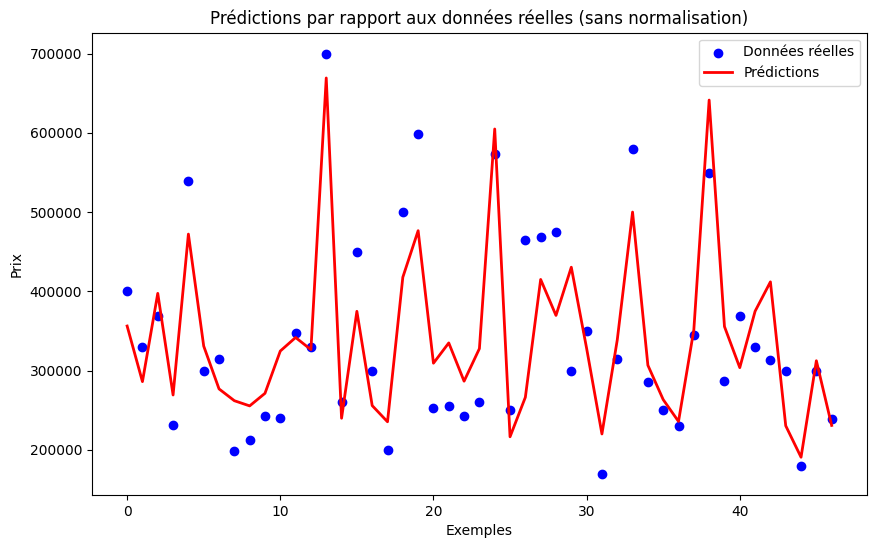

In [348]:
import numpy as np
import time
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Charger les données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',')

# Séparer les caractéristiques (X) et les étiquettes (y)
X = dataMulti[:, :2]  # supérficie et nombre de chambres
y = dataMulti[:, 2]   # prix de la maison

model = LinearRegression()

# données non normalisées
start_time = time.time()
model.fit(X, y)
end_time = time.time()

print("Coefficients du modèle scikit-learn (sans normalisation):")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Prédiction des étiquettes avec le modèle entraîné
y_pred = model.predict(X)

# Coût initial et final
initial_cost = np.mean((y - np.mean(y_pred)) ** 2) / 2
final_cost = np.mean((y - y_pred) ** 2) / 2

print("Coût initial (sans normalisation):", initial_cost)
print("Coût final (sans normalisation):", final_cost)
print("Temps d'exécution de la régression linéaire avec scikit-learn:", end_time - start_time)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Données réelles')
plt.plot(range(len(y)), y_pred, color='red', linewidth=2, label='Prédictions')
plt.xlabel('Exemples')
plt.ylabel('Prix')
plt.title('Prédictions par rapport aux données réelles (sans normalisation)')
plt.legend()
plt.show()

Coefficients du modèle scikit-learn (avec normalisation et mise à l'échelle):
Intercept: 199467.31126290312
Coefficients: [504777.76124214 -34951.66168075]
Coût initial (avec normalisation et mise à l'échelle): 7651160131.281121
Coût final (avec normalisation et mise à l'échelle): 2043280477.3925703


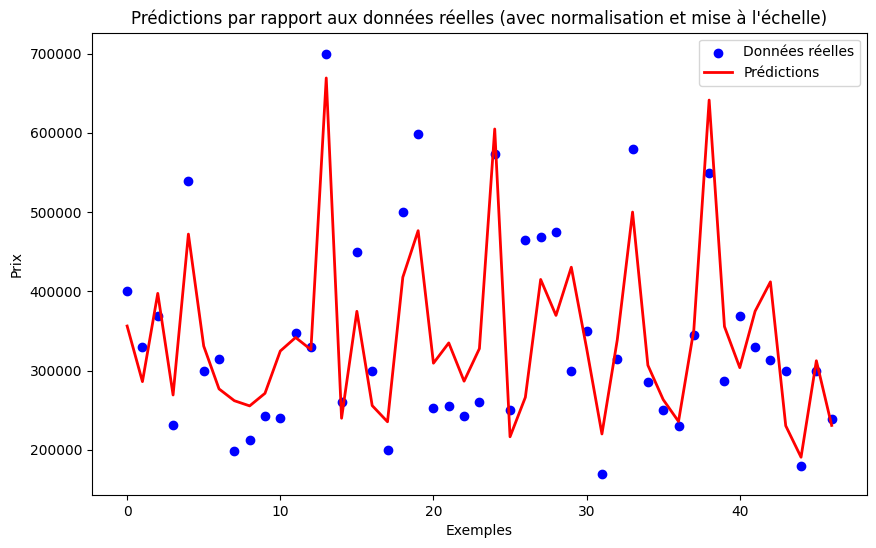

In [349]:
import numpy as np
import time
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',')

X = dataMulti[:, :2]  
y = dataMulti[:, 2]   

# Normalisation des données en moyenne = 0
def mean_normalization(X):
    X_normalized = X - np.mean(X, axis=0)
    return X_normalized

X_normalized = mean_normalization(X)

# Mise à l'échelle des données dans l'intervalle [0,1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_normalized)

model = LinearRegression()

# les données normalisées et mises à l'échelle
start_time = time.time()
model.fit(X_scaled, y)
end_time = time.time()

print("Coefficients du modèle scikit-learn (avec normalisation et mise à l'échelle):")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

y_pred = model.predict(X_scaled)

# Calculer le coût initial et final
initial_cost = np.mean((y - np.mean(y_pred)) ** 2) / 2
final_cost = np.mean((y - y_pred) ** 2) / 2

print("Coût initial (avec normalisation et mise à l'échelle):", initial_cost)
print("Coût final (avec normalisation et mise à l'échelle):", final_cost)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Données réelles')
plt.plot(range(len(y)), y_pred, color='red', linewidth=2, label='Prédictions')
plt.xlabel('Exemples')
plt.ylabel('Prix')
plt.title('Prédictions par rapport aux données réelles (avec normalisation et mise à l\'échelle)')
plt.legend()
plt.show()

Les cout finaux avec et sans normalisation sont tres similaires, cela indique que notre modèle de régression linéaire n’est pas significativement affecté par les différences d’échelle entre les caractéristiques.

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

1. Augmentation de données
2. Exploration des données
Feature engineering :
Explorez différentes transformations et combinaisons de caractéristiques pour créer de nouvelles caractéristiques qui pourraient mieux capturer les relations entre les données et améliorer les performances du modèle.
- Normalisation/standardisation des données
- Validation croisée pour évaluer la robustesse
3. Bagging (Bootstrap Aggregating)
Entraîne plusieurs modèles en parallèle sur des échantillons aléatoires.
Réduit la variance, améliore la robustesse.
4. Boosting
- Entraîne les modèles séquentiellement, chaque modèle corrigeant les erreurs du précédent.
- Réduit le biais, mais peut sur-apprendre.
5. Random Forest
- Version spécifique du bagging pour arbres de décision.
- Sélectionne aléatoirement des sous-ensembles de features.
- Robuste et performant, mais moins précis que le boosting sur certains problèmes.